In [1]:
state = 'ID' 
year = 2020
obj_type = 'inverse_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 154 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 6 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 910358 and U = 928748 and k = 2.

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 5, 6, 11, 12, 13, 21, 24, 35], [0, 2, 3, 4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]]
Objective value: 3.53768722152464
Deviation: 237.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
S

Cutting planes:
  Gomory: 3
  MIR: 1
  Zero half: 14
  RLT: 5

Explored 106 nodes (5489 simplex iterations) in 0.60 seconds (0.21 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 3.53769 

Optimal solution found (tolerance 0.00e+00)
Best objective 3.537687221525e+00, best bound 3.537687221525e+00, gap 0.0000%

User-callback calls 744, time in user-callback 0.01 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[1, 5, 6, 11, 12, 13, 21, 24, 35], [0, 2, 3, 4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]]

****************************************
Trying deviation = 236.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 11, 12, 15, 20, 21, 35, 41], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3


Cutting planes:
  Gomory: 14
  Zero half: 11
  Lazy constraints: 18

Explored 6560 nodes (117493 simplex iterations) in 2.59 seconds (1.20 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 5.24489 

Optimal solution found (tolerance 0.00e+00)
Best objective 5.244888432236e+00, best bound 5.244888432236e+00, gap 0.0000%

User-callback calls 14008, time in user-callback 0.08 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]]

****************************************
Trying deviation = 4.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 11, 12, 15, 21, 24, 33, 34], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30,


     0     0    0.00128    0    1    7.85863    0.00128   100%     -    0s
     0     0    1.28779    0   48    7.85863    1.28779  83.6%     -    0s
     0     0    1.72243    0   42    7.85863    1.72243  78.1%     -    0s
     0     0    1.98602    0   45    7.85863    1.98602  74.7%     -    0s
     0     0    2.02569    0   45    7.85863    2.02569  74.2%     -    0s
     0     0    2.04125    0   48    7.85863    2.04125  74.0%     -    0s
     0     0    2.04125    0   48    7.85863    2.04125  74.0%     -    0s
     0     0    2.05532    0   49    7.85863    2.05532  73.8%     -    0s
     0     0    2.05576    0   50    7.85863    2.05576  73.8%     -    0s
     0     0    2.06150    0   50    7.85863    2.06150  73.8%     -    0s
     0     0    2.06521    0   51    7.85863    2.06521  73.7%     -    0s
     0     0    2.08109    0   53    7.85863    2.08109  73.5%     -    0s
     0     0    2.09052    0   53    7.85863    2.09052  73.4%     -    0s
     0     0    2.09928 

     0     0    2.05694    0   51    8.53981    2.05694  75.9%     -    0s
     0     0    2.05908    0   51    8.53981    2.05908  75.9%     -    0s
     0     0    2.07431    0   55    8.53981    2.07431  75.7%     -    0s
     0     0    2.07608    0   55    8.53981    2.07608  75.7%     -    0s
     0     0    2.12360    0   58    8.53981    2.12360  75.1%     -    0s
     0     0    2.13930    0   59    8.53981    2.13930  74.9%     -    0s
     0     0    2.14345    0   57    8.53981    2.14345  74.9%     -    0s
     0     0    2.14544    0   57    8.53981    2.14544  74.9%     -    0s
     0     0    2.14590    0   56    8.53981    2.14590  74.9%     -    0s
     0     0    2.15353    0   56    8.53981    2.15353  74.8%     -    0s
     0     0    2.16034    0   56    8.53981    2.16034  74.7%     -    0s
     0     0    2.16116    0   56    8.53981    2.16116  74.7%     -    0s
     0     0    2.16207    0   56    8.53981    2.16207  74.7%     -    0s
     0     0    2.18285  

 368163 40151    7.42721   30   55    8.53981    6.21818  27.2%  18.1  417s
 369688 40138 infeasible   35         8.53981    6.21818  27.2%  18.1  421s
 372048 40122    7.84953   35   48    8.53981    6.21818  27.2%  18.1  425s
 375725 40130    7.24115   33   22    8.53981    6.21818  27.2%  18.1  431s
 379107 40006    6.70941   35   16    8.53981    6.21818  27.2%  18.1  436s
 381126 40029    8.14509   31   13    8.53981    6.21818  27.2%  18.1  440s
 384742 39963 infeasible   34         8.53981    6.21818  27.2%  18.1  446s
 388395 39961    6.72123   26   16    8.53981    6.21818  27.2%  18.1  452s
 390477 39972 infeasible   35         8.53981    6.21818  27.2%  18.1  455s
 395357 40016    7.64109   36   17    8.53981    6.21818  27.2%  18.0  463s
 397741 40065    7.21150   33   35    8.53981    6.21818  27.2%  18.0  467s
 399529 40024     cutoff   32         8.53981    6.21818  27.2%  18.0  470s
 403327 40014    6.93716   34   26    8.53981    6.21818  27.2%  18.0  478s
 405430 4001

 669196 10503    8.17323   33   16    8.53981    6.21818  27.2%  17.5  957s
 671385  9779    8.19743   34   16    8.53981    6.21818  27.2%  17.5  960s
 675616  8124 infeasible   35         8.53981    6.21818  27.2%  17.4  967s
 677760  7294 infeasible   32         8.53981    6.21818  27.2%  17.4  970s
 682004  5193 infeasible   35         8.53981    6.21818  27.2%  17.4  975s
 686442  2632 infeasible   33         8.53981    6.21818  27.2%  17.4  980s
 691947    89    7.98997   33   16    8.53981    7.86299  7.93%  17.3  985s

Cutting planes:
  Gomory: 11
  Cover: 1385
  MIR: 151
  StrongCG: 153
  Flow cover: 38
  Inf proof: 13
  Zero half: 12
  Lazy constraints: 107

Explored 692371 nodes (11969499 simplex iterations) in 985.90 seconds (153.01 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 8.53981 

Optimal solution found (tolerance 0.00e+00)
Best objective 8.539806032366e+00, best bound 8.539806032366e+00, gap 0.0000%

User-callback calls 1413182, tim

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")


####################################################################################################
Pareto Frontier for state ID,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 11, 12, 19, 21, 28, 29, 35], [0, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[1, 2, 11, 12, 15, 21, 24, 33, 34], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 

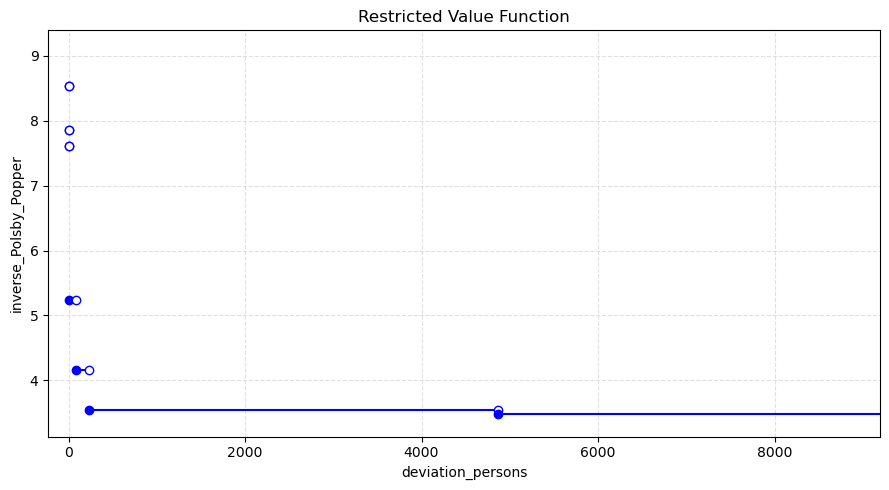

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state ID, objective inverse_Polsby_Popper
####################################################################################################



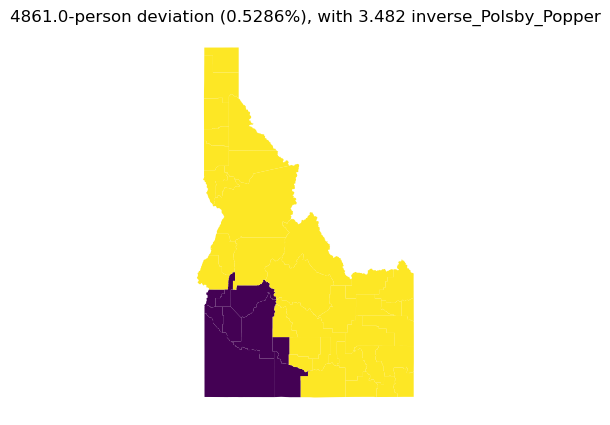

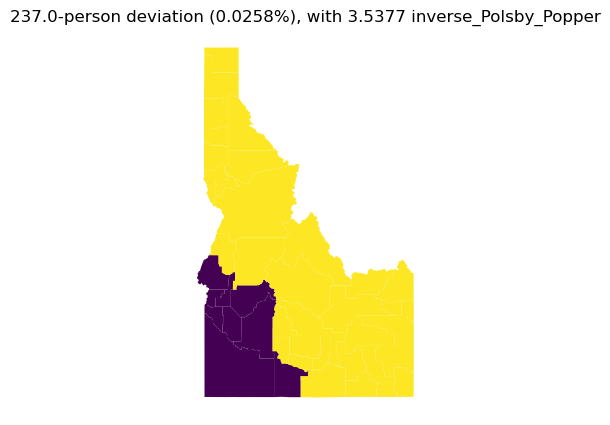

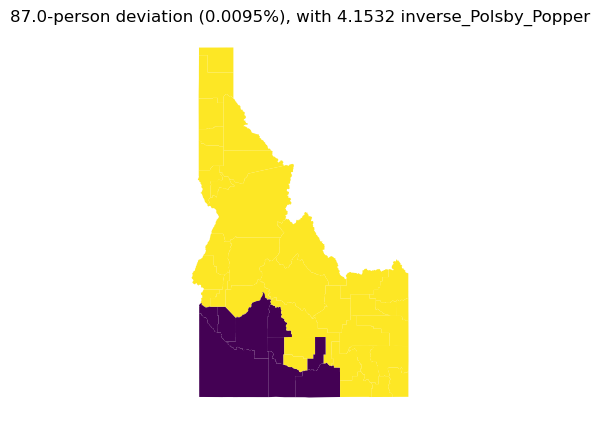

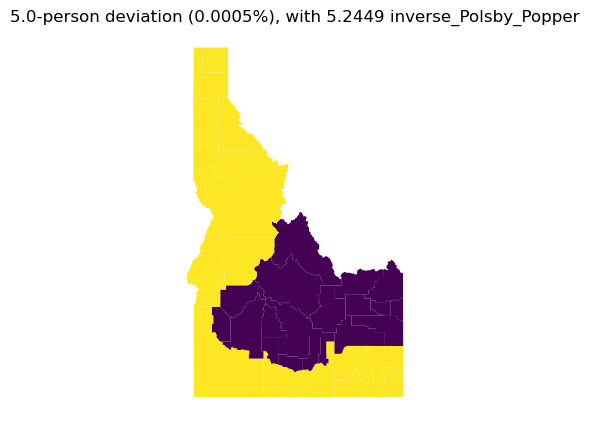

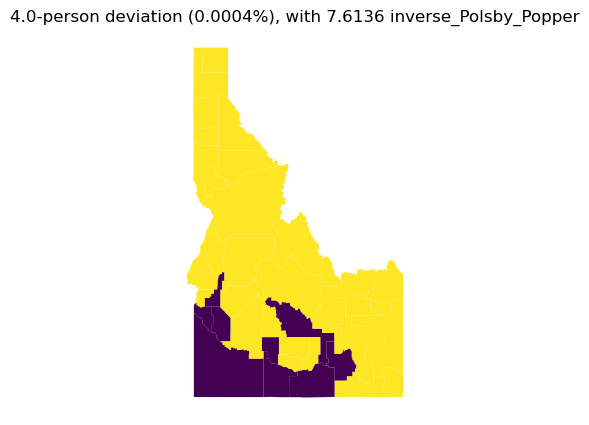

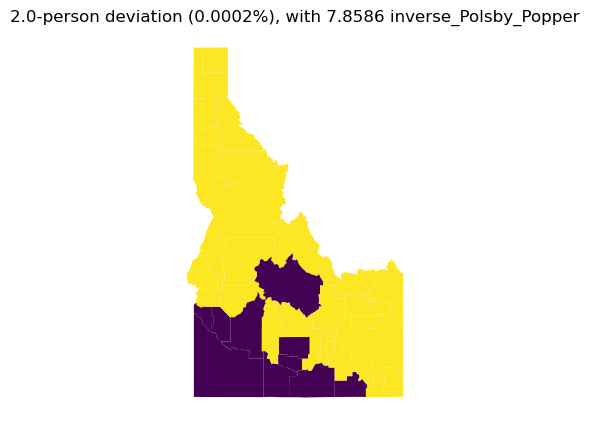

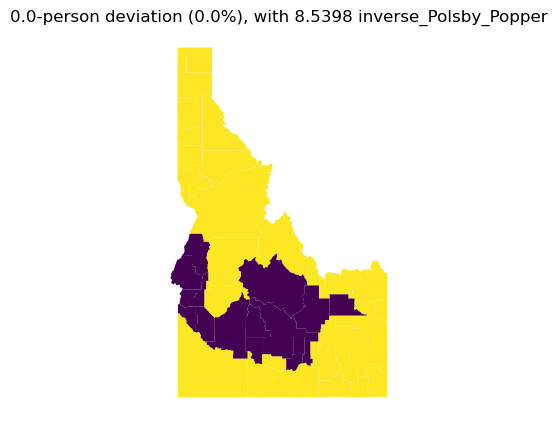

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)